In [82]:
import pandas as pd
import numpy as np
import pypsa
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
network = pypsa.Network()

network.set_snapshots(range(4))

In [84]:
network.add('Carrier', 'gas', co2_emissions=0.2)
network.add('Bus', name='electricity')
network.add('Generator',
            name='turbine_1',
            bus='electricity',
            p_nom=500,
            marginal_cost=20,
            carrier='gas',
            ramp_limit_up=0.5,
            ramp_limit_down=0.5,
            efficiency=0.4
            )
network.add('Generator',
            name='grid',
            bus='electricity',
            p_nom=1000,
            marginal_cost=100)
network.add('Load', name='electric_load', bus='electricity', p_set=[500, 400, 750, 100])

print(network)

PyPSA Network
Components:
 - Bus: 1
 - Carrier: 1
 - Generator: 2
 - Load: 1
Snapshots: 4


In [85]:
network.optimize(solver_name='gurobi', solver_options={'OutputFlag': 0})

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - OutputFlag: 0


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-04-24


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-04-24
INFO:linopy.io: Writing time: 0.03s


Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-nugoeoc3.lp


INFO:gurobipy:Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-nugoeoc3.lp


Reading time = 0.01 seconds


INFO:gurobipy:Reading time = 0.01 seconds


obj: 26 rows, 8 columns, 36 nonzeros


INFO:gurobipy:obj: 26 rows, 8 columns, 36 nonzeros
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 8 primals, 26 duals
Objective: 6.70e+04
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down were not assigned to the network.


('ok', 'optimal')

In [86]:
print(network.buses_t.p)
print(network.generators_t.p)
print(network.loads_t.p)

Bus       electricity
snapshot             
0                 0.0
1                 0.0
2                 0.0
3                 0.0
Generator  turbine_1   grid
snapshot                   
0              500.0    0.0
1              400.0    0.0
2              350.0  400.0
3              100.0    0.0
Load      electric_load
snapshot               
0                 500.0
1                 400.0
2                 750.0
3                 100.0


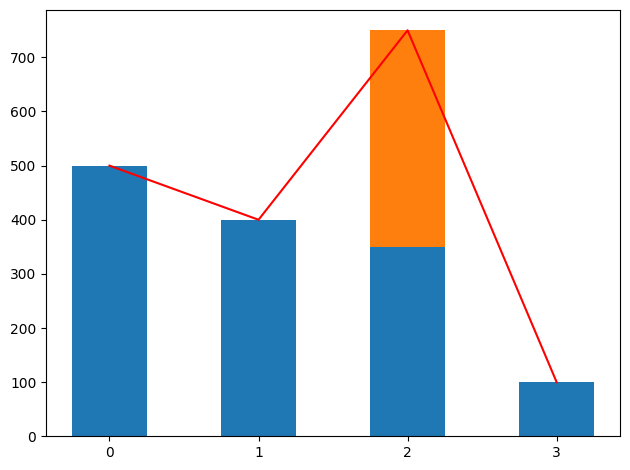

In [87]:
idx = network.generators_t.p.index
values = {'turbine_1': network.generators_t.p['turbine_1'].values,
          'grid': network.generators_t.p['grid'].values}

bottom = np.zeros(len(idx))

fig, ax = plt.subplots()

for _, value in values.items():
    ax.bar(idx, value, width=0.5, bottom=bottom)
    bottom += value

ax.plot(network.loads_t.p.index, network.loads_t.p['electric_load'], 'r')

ax.set_xticks(network.generators_t.p.index)
fig.tight_layout()

In [88]:
print(network.generators_t.p['turbine_1'].items)

<bound method Series.items of snapshot
0    500.0
1    400.0
2    350.0
3    100.0
Name: turbine_1, dtype: float64>


In [89]:
print(network.objective)

67000.0
